In [ ]:
'''
Content
1. Dataset check
    1.1 Null data check
    1.2 Target label check
2. Exploratory data analysis
    2.1 Pclass
    2.2 Sex
    2.3 Both Sex and Pclass
    2.4 Age
    2.5 Pclass, Sex, Age
    2.6 Embarked
    2.7 Family - SibSp(Brother & Sister) + Parch (Parents & Children)
    2.8 Cabin
'''

In [ ]:
'''
만약 데이터 사이언스, 머신러닝 또는 캐글에서 어떤 것을 해야하는지 잘 모르는 newbie라면, 타이타닉을 하시는 게 가장 좋은 선택입니다.
타이타닉은 아시다시피, 사상 최대 해난사고로써, 1,500여명의 희생자가 발생했습니다.
우리는 이 튜토리얼에서 타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델을 생성할 것입니다.
본 튜토리얼에서는 여러 시각화 도구(matplotlib, seabon, plotly), 데이터 분석 도구(pandas,nnumpy), 머신러닝 도구(sklearn)을 사용할 것 입니다.
본 튜토리얼은 캐글에 있는 여러 커널들을 참조하여 만들었습니다.
본 튜토리얼을 공부하신 뒤에, 캐글 타이타닉 컴퍼티션에 존재하는 여러 다른 커널들을 더 공부하시면 됩니다.
본 튜토이얼은 파이썬 문법에 어려움이 없으셔야 수월할 것입니다.
여기서 사용하는 라이브러리들을 써본 경험이 있으면 좋겠지만, 경험이 없다하더라도 한 줄씩 천천히 적어나가시면 충분히 하실 수 있습니다.
'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
'''
위 두줄은 필자가 항상 쓰는 방법.
matplotlib의 기본 scheme 말고 seaborn scheme을 세팅하고, 일일이 graph의 font size를 지정할 필요 없이
seaborn의 font_size를 사용하면 편리함
'''

import missingo as msno

#ignore warnings
import warnings
warnings.filterwarning('igonre')

%matplotlib inline

/tmp/ipykernel_31654/264294859.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


ModuleNotFoundError: No module named 'missingo'

In [ ]:
'''
앞으로 진행할 프로세스는 다음과 같다
1. 데이터셋 확인
    - 대부분의 캐글 데이터들은 잘 정제되어 있음.
    하지만 가끔, null data가 존재함.
    이를 확인하고, 향후 수정
2. 탐색적 데이터 분석 (exploratory data analysis)
    - 여러 feature들을 개별적으로 분석하고, feature들 간의 상관관계를 확인
    여러 시각화 툴을 사용하여 insight를 얻음
3. feature engineering
    - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering 함
    one-hot, encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 함
4. model 만들기
    - sklearn을 사용해 모델을 만듬
    파이썬 머신러닝을 할 때는 sklearn을 사용하면 수 많은 알고리즘을 일관된 문법으로 사용 가능
    물론 딥러닝을 위해 tensorflow, pytorch 등을 사용 할 수 있음
5. 모델 학습 및 예측
    - trainset을 가지고 모델을 학습 시킨 후, testset을 가지고 prediction 실시
6. 모델 평가
    - 예측 성능이 원하는 수준인지 판단.
    풀려는 문제에 따라 모델을 평가하는 방식도 달라짐
    학습된 모델이 어떤 것을 학습하였는지 확인
'''

In [ ]:
'''
1. Dataset 확인
    1.1 파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화 되어있으며, 많이 쓰는 라이브러리는 pandas이다
    1.2 pandas를 사용하여 데이터셋의 간단한 통계적 분석부터, 복잡한 처리들을 간단한 메소드를 사용하여 할 수 있음.
    1.3 캐글에서 데이터셋은 보통 train, testset으로 나뉘어져 있음.
'''

In [20]:
print('-----------------------Dataset check-----------------------')

df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

df_train.head()

-----------------------Dataset check-----------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
'''
우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare 이며, 예측하려는 target label은 Survived 이다.
pandas dataframe에는 describe() 메소드가 있는데, 이를 쓰면 각 feature가 가진 통계치들을 반환해 줌
'''

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [1]:
'''
테이블에서 보다시피, PassenserID 숫자와 다른, 그러니깐, null data가 존재하는 열(feature)가 있음
이를 좀 더 보기 편하게 그래프로 시각화하여 확인하기
'''

'\n테이블에서 보다시피, PassenserID 숫자와 다른, 그러니깐, null data가 존재하는 열(feature)가 있음\n이를 좀 더 보기 편하게 그래프로 시각화하여 확인하기\n'

In [8]:
print('-----------------------1.1 Null data check-----------------------')

for col in df_train.columns :
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format
    (col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
    
for col in df_test.columns :
    msg = 'column: {:>10}\t Percent of NaN value : {: .2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

-----------------------1.1 Null data check-----------------------
<built-in method format of str object at 0x7eff230d37b0>
<built-in method format of str object at 0x7eff230d37b0>
<built-in method format of str object at 0x7eff230d37b0>
<built-in method format of str object at 0x7eff230d37b0>
<built-in method format of str object at 0x7eff230d37b0>
<built-in method format of str object at 0x7eff230d37b0>
<built-in method format of str object at 0x7eff230d37b0>
<built-in method format of str object at 0x7eff230d37b0>
<built-in method format of str object at 0x7eff230d37b0>
<built-in method format of str object at 0x7eff230d37b0>
<built-in method format of str object at 0x7eff230d37b0>
<built-in method format of str object at 0x7eff230d37b0>
column: PassengerId	 Percent of NaN value :  0.00%
column:     Pclass	 Percent of NaN value :  0.00%
column:       Name	 Percent of NaN value :  0.00%
column:        Sex	 Percent of NaN value :  0.00%
column:        Age	 Percent of NaN value :  20.57

In [ ]:
'''
Train, Test set에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data가 존재하는 것을 볼 수 있음.
Mano 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있음.
'''

In [17]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color = (0.8, 0.5, 0.2))

NameError: name 'msno' is not defined

In [ ]:
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

In [ ]:
msno.bar(df=df_test.iloc[:, :], figsize(8,8), color=(0.8, 0.5, 0.2))

In [ ]:
'''
target_lable이 어떤 distribution을 가지고 있는지 확인해야함
지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있음.
'''

-----------------------1.2 Target label check-----------------------


TypeError: countplot() got multiple values for argument 'data'

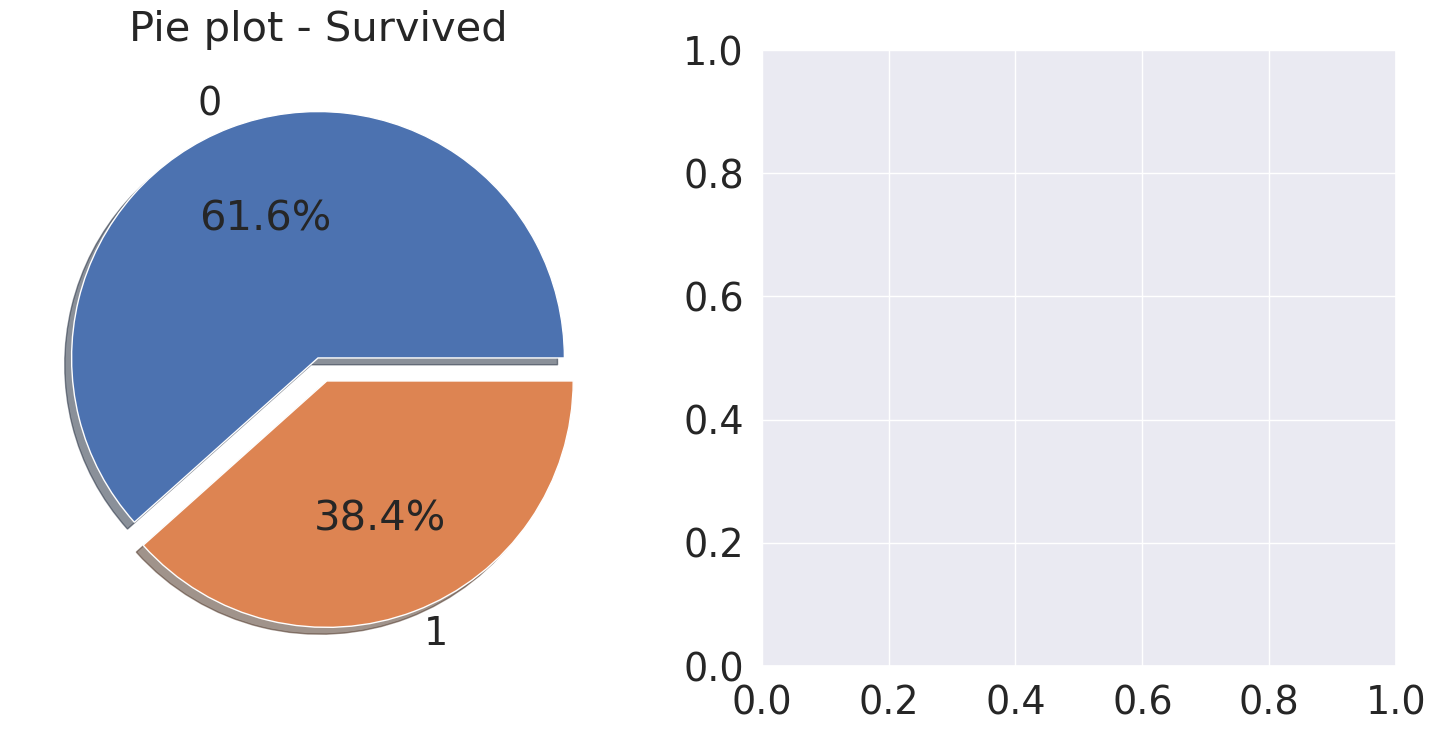

In [21]:
print('-----------------------1.2 Target label check-----------------------')

f, ax = plt.subplots(1, 2, figsize = (18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [ ]:
'''
위 countplot이 작동하지않음.
해당 커널을 옮겨서 작동시켜도 동일함.
사유는 다음 필사 때 찾아보기
'''

'''
안타깝게도 죽은 사람이 많음.
38.4%가 살아남음
target_label의 분포가 제법 균일(balanced)함.
불균일한 경우, 예를 들어 100중 1: 99개, 0:1개인 경우에 모든것이 1이라고 해도 정확도는 99%가 나옴.
0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없음.
'''

In [ ]:
'''
2. Exploratory data analysis

    - 이제 본격적으로 데이터 분석을 해보겠습니다.
    데이터는 매우 많습니다.
    이 많은 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요함
    
    -시각화 라이브러리는 matplotlib, seaborn, plotly등이 있음.
    특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편리함.
'''

In [ ]:
'''
2-1 Pclass
    - 먼저 Pclass 에 대해 살펴보기로 함.
    Pclass는 ordinal, 서수형 데이터입니다.
    카테고리이면서, 순서가 있는 데이터 타입입니다.
    
    -Pclass에 따른 생존률의 차이를 살펴보기로 함
    엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby 를 사용하면 쉽게 구현 가능
    또한 pivot 이라는 메소스도 있음.
    
    -'Pclass', 'Survived'를 가져온 후, pclass로 묶음.
    그러고나면 각 pclass 마다 0, 1이 count되며, 이를 평균내면 각 pclass 별 생존률이 나옴
    
    -아래와 같은 count()를 하면, 각 class에 몇명이 있는지 확인할 수 있으며, sum()을 하면, 216명 중 생존한(Survived=1) 사람의 총합을 주게 됨
'''

In [23]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [25]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [ ]:
'''
pandas의 crossta을 사용하면 좀 더 위 과정을 좀더 수월하게 볼 수 있음.
'''

In [26]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [ ]:
'''
grouped 객체에 mean()을 하게되면, 각 클래스별 생존률을 얻을 수 있음.
class 1이면 아래과 같음

80 / (80 + 136) == 0.63
'''

<Axes: xlabel='Pclass'>

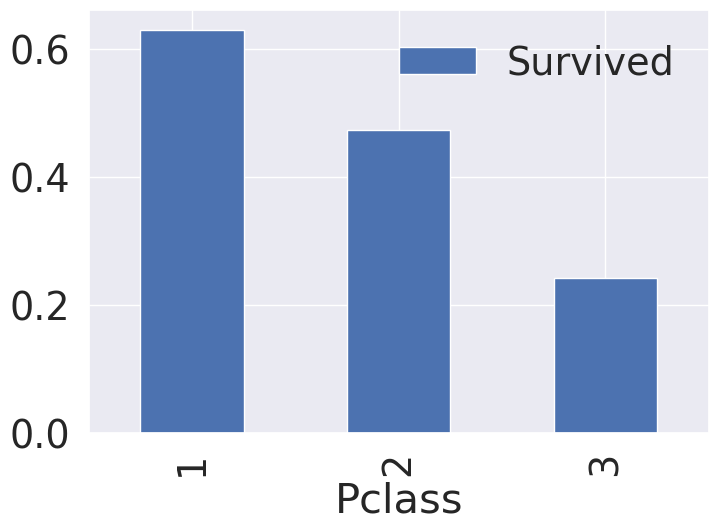

In [27]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

In [ ]:
'''
보다시피, Pclass가 좋을수록(1st) 생존률이 좊은 것을 확인할 수 있음
보기 쉽게 그래프로 그려보겠습니다.
seaborn의 countplot을 이용하면, 특정 label에 따른 개수를 확인해볼 수 있음.
'''

TypeError: countplot() got multiple values for argument 'data'

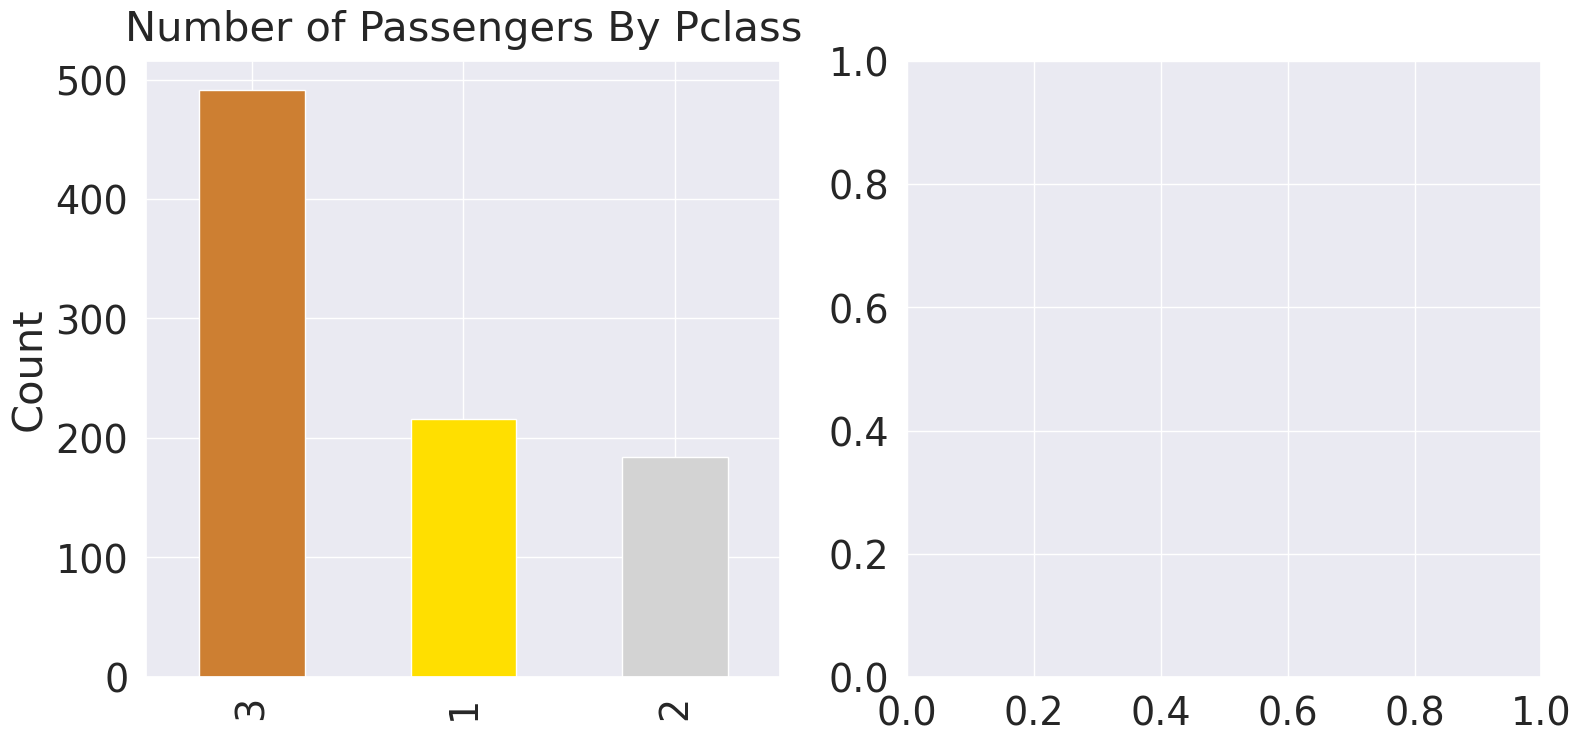

In [32]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y= y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

In [ ]:
'''
클래스가 높을 수록, 생존 확률이 높은걸 확인할 수 있음.
Pclass 1, 2, 3 순서대로 63#, 48%, 25%
생존에 Pclass가 큰 영향을 미친다고 생각됨.
나중에 모델을 세울 때 이 feature를 사용하면 좋을 것이라 판단 가능
'''

In [ ]:
'''
2.2 Sex
    -이번에는 성별로 생존률이 어떻게 달라지는 지 확인
    -마찬가지로 pandas groupby와 seaborn countplot을 사용해서 시각화
'''

TypeError: countplot() got multiple values for argument 'data'

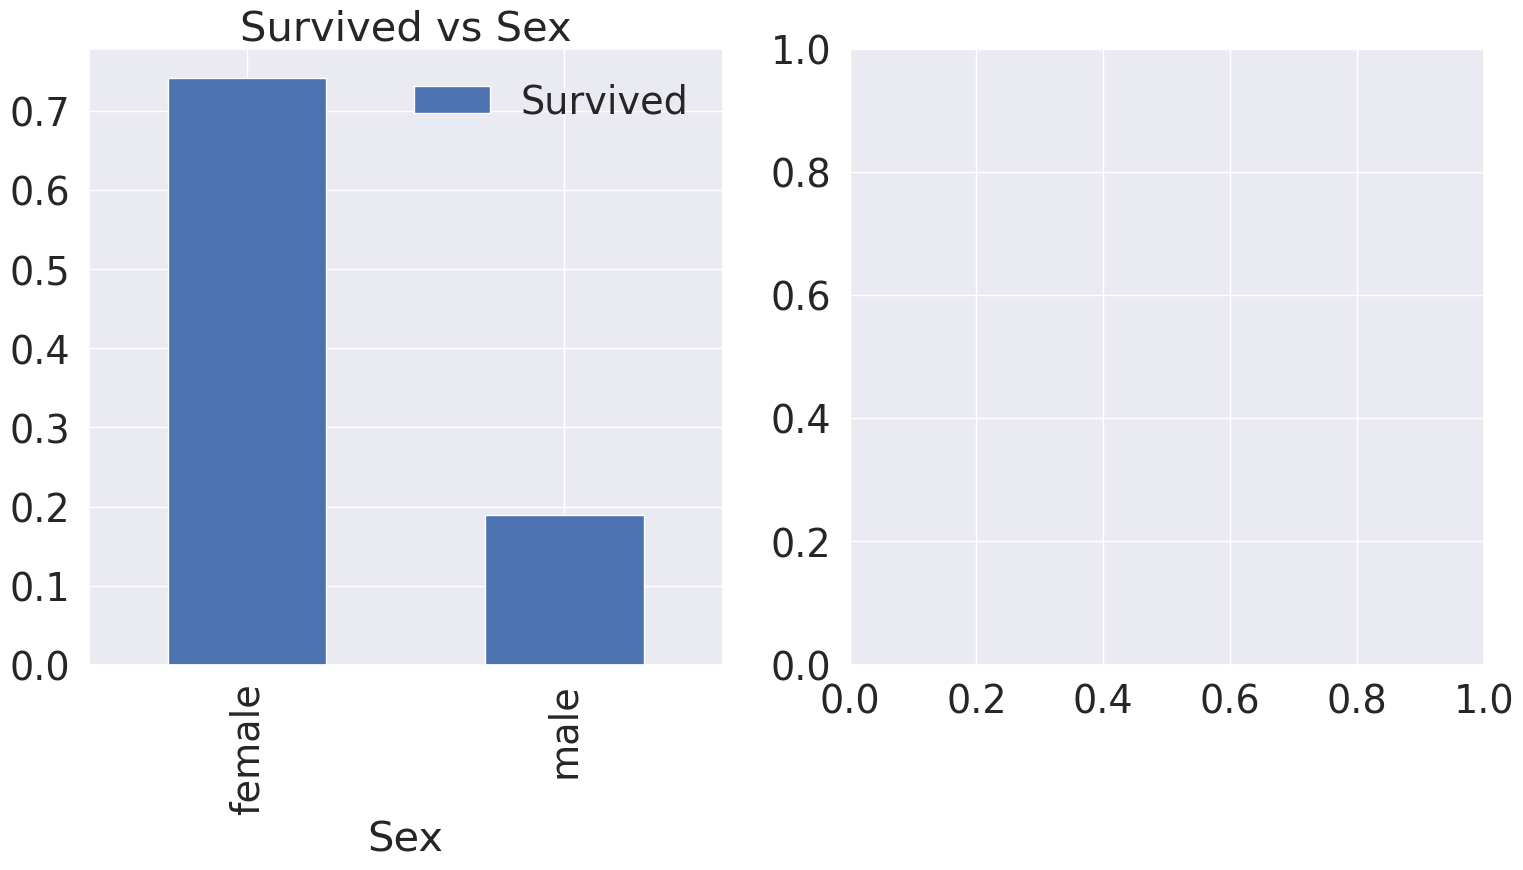

In [36]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [37]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [38]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [ ]:
'''
Pclass 와 마찬가지로, sex도 예측 모델에 쓰일 중요한 feature 임을 알 수 있다.
'''

In [ ]:
'''
2.3 Both sex and Pclass

'''